# Install the necessary libraries

In [1]:
!pip install tensorflow scikit-learn pandas matplotlib seaborn


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


# Import the Libraries

In [2]:
# Import pandas, matplotlib, seaborn for data processing and visualization
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import numpy and sklearn to perform data scaling
import numpy as np
from sklearn.preprocessing import StandardScaler

# Import tensorflow to build the model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
import pickle as pk

sns.set()


# Data Preprocessing

In [3]:
# Import the data
raw_data = pd.read_csv("Crop and fertilizer dataset.csv")
raw_data.describe()

,Nitrogen,Phosphorus,Potassium,pH,Rainfall,Temperature
count,4513.000000,4513.000000,4513.000000,4513.000000,4513.000000,4513.000000
mean,95.409927,54.341901,63.595170,6.715267,819.189010,25.915134
std,38.060648,16.551991,35.691911,0.625198,251.730813,5.897328
min,20.000000,10.000000,5.000000,5.500000,300.000000,10.000000
25%,60.000000,40.000000,40.000000,6.000000,600.000000,20.000000
50%,105.000000,55.000000,55.000000,6.500000,800.000000,25.000000
75%,125.000000,65.000000,75.000000,7.000000,1000.000000,30.000000
max,150.000000,90.000000,150.000000,8.500000,1700.000000,40.000000


In [4]:
# View first 5 rows
raw_data.head()

,District_Name,Soil_color,Nitrogen,Phosphorus,Potassium,pH,Rainfall,Temperature,Crop,Fertilizer,Link
0,Kolhapur,Black,75,50,100,6.5,1000,20,Sugarcane,Urea,https://youtu.be/2t5Am0xLTOo
1,Kolhapur,Black,80,50,100,6.5,1000,20,Sugarcane,Urea,https://youtu.be/2t5Am0xLTOo
2,Kolhapur,Black,85,50,100,6.5,1000,20,Sugarcane,Urea,https://youtu.be/2t5Am0xLTOo
3,Kolhapur,Black,90,50,100,6.5,1000,20,Sugarcane,Urea,https://youtu.be/2t5Am0xLTOo
4,Kolhapur,Black,95,50,100,6.5,1000,20,Sugarcane,Urea,https://youtu.be/2t5Am0xLTOo


In [5]:
raw_data['Crop'].unique()

array(['Sugarcane', 'Jowar', 'Cotton', 'Rice', 'Wheat', 'Groundnut',
       'Maize', 'Tur', 'Urad', 'Moong', 'Gram', 'Masoor', 'Soybean',
       'Ginger', 'Turmeric', 'Grapes'], dtype=object)

In [6]:
# Drop the unnecessary columns
raw_data.drop(['Fertilizer', 'Link'], axis = 1, inplace = True)

In [7]:
raw_data['Soil_color'].unique()

array(['Black', 'Red ', 'Medium Brown', 'Dark Brown', 'Red',
       'Light Brown', 'Reddish Brown'], dtype=object)

In [8]:
numeric_data = raw_data.select_dtypes(include=['number'])

# Calculate the correlation matrix
corr_matrix = numeric_data.corr()
print(corr_matrix)

             Nitrogen  Phosphorus  Potassium        pH  Rainfall  Temperature
Nitrogen     1.000000    0.709539   0.584315  0.182850  0.269364    -0.010213
Phosphorus   0.709539    1.000000   0.573970  0.244945  0.225453    -0.055303
Potassium    0.584315    0.573970   1.000000  0.075110  0.445671     0.053413
pH           0.182850    0.244945   0.075110  1.000000  0.097884    -0.002949
Rainfall     0.269364    0.225453   0.445671  0.097884  1.000000     0.315045
Temperature -0.010213   -0.055303   0.053413 -0.002949  0.315045     1.000000


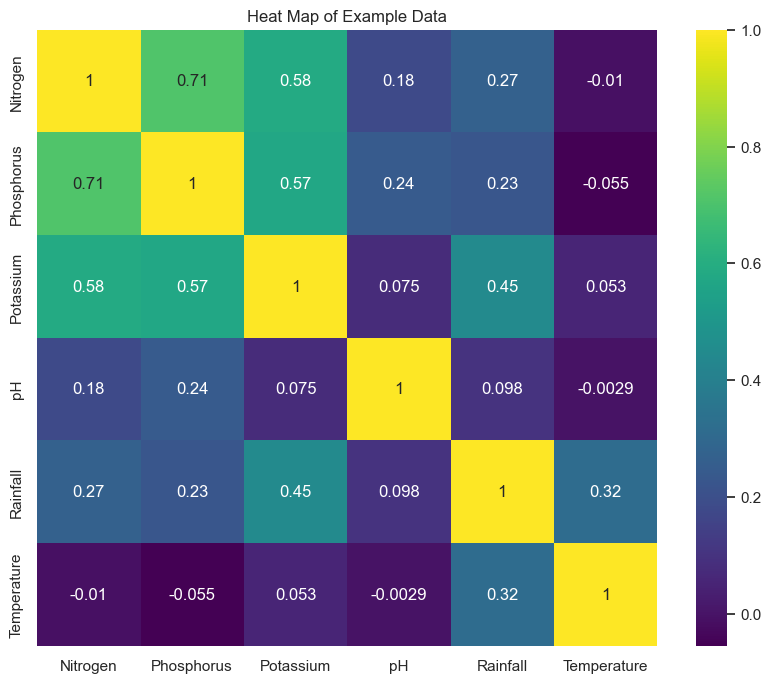

In [9]:
plt.figure(figsize=(10, 8))  # Set the size of the plot
sns.heatmap(corr_matrix, annot=True, cmap='viridis')  # annot=True to display values in the cells
plt.title('Heat Map of Example Data')  # Add a title
plt.show()  # Display the plot

In [10]:
# Split the data into Dependent and Independent Variables

X = raw_data.drop(['Rainfall', 'Crop'], axis = 1) # Independent Variable

y = pd.get_dummies(raw_data['Crop'], dtype = int) # Dependent Variable


In [11]:
# Replace categorical Values with numerical values

X_encoded = pd.get_dummies(X, columns=['District_Name', 'Soil_color'], dtype = int)
X_encoded.drop('Soil_color_Red ', inplace = True, axis = 1) # Drop the repeated occurence of the soil type = RED
X_encoded.head()



,Nitrogen,Phosphorus,Potassium,pH,Temperature,District_Name_Kolhapur,District_Name_Pune,District_Name_Sangli,District_Name_Satara,District_Name_Solapur,Soil_color_Black,Soil_color_Dark Brown,Soil_color_Light Brown,Soil_color_Medium Brown,Soil_color_Red,Soil_color_Reddish Brown
0,75,50,100,6.5,20,1,0,0,0,0,1,0,0,0,0,0
1,80,50,100,6.5,20,1,0,0,0,0,1,0,0,0,0,0
2,85,50,100,6.5,20,1,0,0,0,0,1,0,0,0,0,0
3,90,50,100,6.5,20,1,0,0,0,0,1,0,0,0,0,0
4,95,50,100,6.5,20,1,0,0,0,0,1,0,0,0,0,0


'Nitrogen', 'Phosphorus', 'Potassium', 'pH', 'Temperature',
        'District_Name_Kolhapur', 'District_Name_Pune', 'District_Name_Sangli', 'District_Name_Satara', 'District_Name_Solapur',
        'Soil_color_Black', 'Soil_color_Dark Brown', 'Soil_color_Light Brown', 'Soil_color_Medium Brown', 'Soil_color_Red', 'Soil_color_Reddish Brown'

Scalae the Data using Standard Scalar

In [12]:
scalar = StandardScaler() # Import the scalar data
scalar.fit(X_encoded) # Fit the data
X_scaled = scalar.transform(X_encoded)

Split the data into Trainning, Testing and validataion sets with a split of 8:1:1 respectively.

In [13]:
import numpy as np
from sklearn.model_selection import train_test_split
# Split data into training and temporary set (80% training, 20% temporary)
X_train_temp, X_test, y_train_temp, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Split temporary set into validation and final test set (50% validation, 50% test)
X_train, X_val, y_train, y_val = train_test_split(X_train_temp, y_train_temp, test_size=0.5, random_state=42)

# Print size of each set
print("Training set:", X_train.shape, y_train.shape)
print("Validation set:", X_val.shape, y_val.shape)
print("Test set:", X_test.shape, y_test.shape)

Training set: (1805, 16) (1805, 16)
Validation set: (1805, 16) (1805, 16)
Test set: (903, 16) (903, 16)


# Built the model

In [14]:

# Define the model
model = Sequential([
    Dense(64, input_shape=(16,), activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(16, activation='softmax')  # 11 units for 11 classes, softmax for multi-class
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


# Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, mode='max', verbose=1)

# Fit the model
history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=32,
                    validation_data=(X_val, y_val),
                    callbacks=[early_stopping])




Epoch 1/50


d:\Data Transfer\Coding\Python\Project\Crop_rec_system\temp\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1269 - loss: 2.7371 - val_accuracy: 0.4693 - val_loss: 2.2427
Epoch 2/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5082 - loss: 1.9493 - val_accuracy: 0.6482 - val_loss: 1.2321
Epoch 3/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6910 - loss: 1.1361 - val_accuracy: 0.7950 - val_loss: 0.8586
Epoch 4/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8016 - loss: 0.7444 - val_accuracy: 0.8371 - val_loss: 0.6265
Epoch 5/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8438 - loss: 0.5339 - val_accuracy: 0.8604 - val_loss: 0.4866
Epoch 6/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8785 - loss: 0.4427 - val_accuracy: 0.8792 - val_loss: 0.4057
Epoch 7/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8942 - loss: 0.3450 - val_accuracy: 0.8886 - val_loss: 0.3441
Epoch 8/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9011 - loss: 0.3084 - val_accuracy: 0.9003 - val_loss: 0.3206
Epo

In [15]:
# Find the test accuracy on test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy}")

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 612us/step - accuracy: 0.9762 - loss: 0.0647
Test Accuracy: 0.9800664186477661


Save the model and Scalar objects.

In [16]:
# Save the model as a pkl file
with open('model.pkl', 'wb') as f:
    pk.dump(model, f)

In [17]:
# Save the scalar Object as a pkl file
with open('scaler.pkl', 'wb') as f:
    pk.dump(scalar, f)